In [4]:
 # Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the breast cancer dataset
breast_cancer_dataset = load_breast_cancer()

In [6]:
# Create a DataFrame from the dataset
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
target = breast_cancer_dataset.target

In [7]:

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_frame)

In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [9]:
# Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

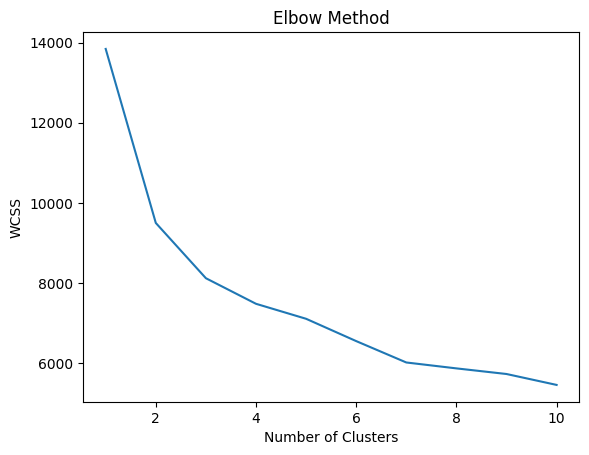

In [10]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# From the graph, we can see that the elbow point is around k=2 or k=3, so let's choose k=2 for simplicity

# Initialize and fit k-means clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [12]:
# Visualize the clusters
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

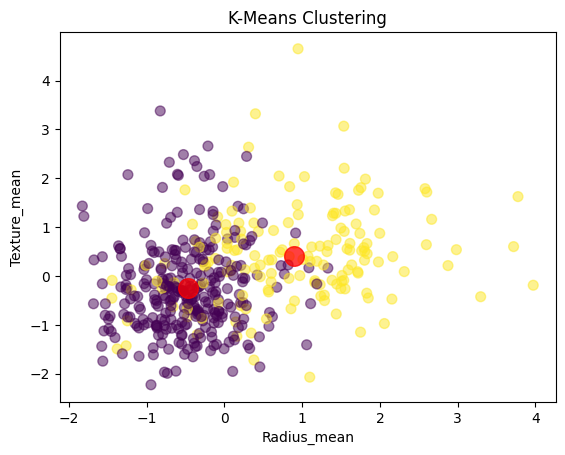

In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.xlabel('Radius_mean')
plt.ylabel('Texture_mean')
plt.show()

In [12]:
# Proceed to the next statement without waiting for the pairplot to finish
print("This line executes immediately without waiting for the pairplot to be displayed")

This line executes immediately without waiting for the pairplot to be displayed


In [41]:
# Predict the clusters for the test set
cluster_labels = kmeans.predict(X_test)

In [42]:
# Calculate accuracy
# Since k-means assigns arbitrary labels to clusters, we need to map cluster labels to target labels to calculate accuracy
# Here, we'll map the majority cluster label to the majority target label
majority_target_label_0 = np.argmax(np.bincount(y_train[kmeans.labels_ == 0]))
majority_target_label_1 = np.argmax(np.bincount(y_train[kmeans.labels_ == 1]))

In [43]:
mapped_cluster_labels = np.where(cluster_labels == 0, majority_target_label_0, majority_target_label_1)


In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, mapped_cluster_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [45]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette score
silhouette = silhouette_score(X_train, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.34338071435069145


In [46]:
# Davies–Bouldin index
davies_bouldin = davies_bouldin_score(X_train, kmeans.labels_)
print("Davies–Bouldin Index:", davies_bouldin)

Davies–Bouldin Index: 1.3368625389240756


In [47]:
# Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X_train, kmeans.labels_)
print("Calinski-Harabasz Index:", calinski_harabasz)

Calinski-Harabasz Index: 207.51191493131725
